### Import the basic modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

 ### Load the data and its attributes information

In [2]:
energy_data = pd.read_csv('./Data/energydata_complete.csv')
attrib_txt =  open(r'./Data/Attribute information.txt','r')
file =[]
attrib = {}
for line in attrib_txt:
    if line != '\n':
        file.append(line)
file = [line.replace('\n', '') for line in file]
for text_line in file:
    key, _, value = text_line.partition(',') 
    attrib[key] = value
info = {'Features': attrib.keys(), 'Descriptions': attrib.values()}
attrib_info = pd.DataFrame(info)

In [3]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
attrib_info

,Features,Descriptions
0,Date,time year-month-day hour:minute:second
1,Appliances,energy use in Wh
2,lights,energy use of light fixtures in the house in Wh
3,T1,"Temperature in kitchen area, in Celsius"
4,RH_1,"Humidity in kitchen area, in %"
5,T2,"Temperature in living room area, in Celsius"
6,RH_2,"Humidity in living room area, in %"
7,T3,Temperature in laundry room area
8,RH_3,"Humidity in laundry room area, in %"
9,T4,"Temperature in office room, in Celsius"


### Exploratory Data Analysis

In [5]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [7]:
energy_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
# Compute the correlation between each variable in the dataset
energy_data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


### Correlation Heatmap

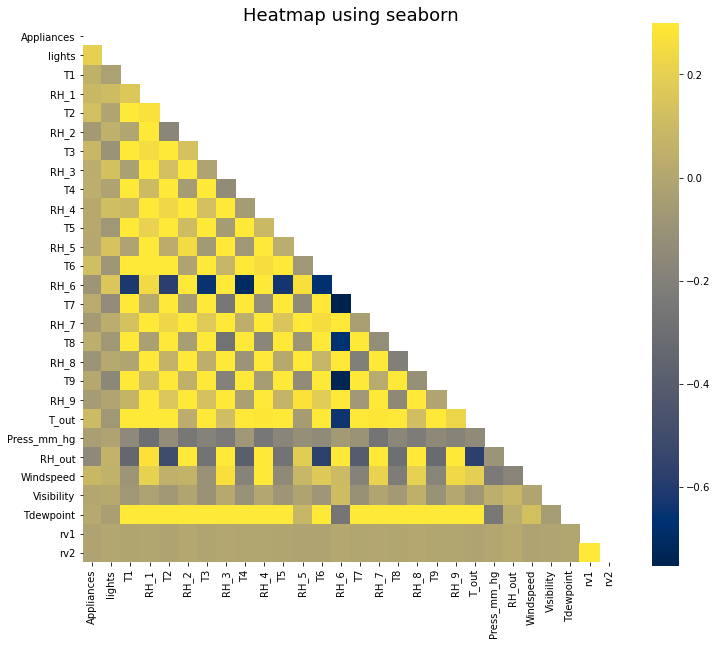

In [9]:
corr = energy_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,10))

# plot the data using seaborn
ax = sns.heatmap(corr, 
                 mask = mask, 
                 vmax = 0.3, 
                 square = True,  
                 cmap = "cividis")
# set the title for the figure
ax.set_title("Heatmap using seaborn", fontsize = 18 );

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation_checker(dataset, threshold):
    corr_col = []  # List of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                corr_col.append(colname)
    return set(corr_col) # set of all the names of correlated columns for 

In [11]:
corr_column = correlation_checker(energy_data, 0.7)
print(list(corr_column))
len(corr_column)

['T7', 'RH_9', 'T3', 'RH_6', 'RH_7', 'T2', 'RH_3', 'T5', 'RH_out', 'RH_2', 'T6', 'RH_8', 'T4', 'rv2', 'Tdewpoint', 'T8', 'RH_4', 'T9', 'T_out']


19

<AxesSubplot:xlabel='Appliances', ylabel='Density'>

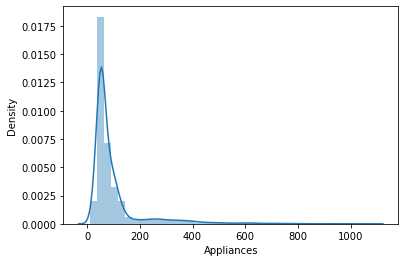

In [12]:
sns.distplot(energy_data['Appliances'], bins = 40)

<AxesSubplot:xlabel='Appliances'>

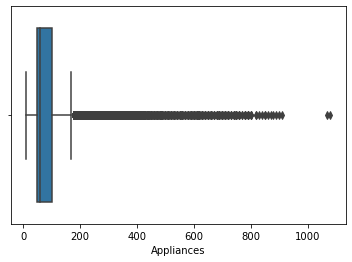

In [13]:
sns.boxplot(energy_data['Appliances'])

In [14]:
cat_features = energy_data.select_dtypes(include = [np.object])
num_features = energy_data.select_dtypes(include = [np.number])
cat_cols = cat_features.columns
num_cols = num_features.columns

In [15]:
# Skewness of the numerical data
# Kurtosis of numerical data
skew = []
kurt = []
symmetry = []
normal_data = []
skewed_num_data = []
for col in num_features.columns:
    x=num_features[col].skew()
    y = num_features[col].kurt()
    skew.append(x)
    kurt.append(y)
    if x < -0.5:
        symmetry.append('Left Skewed')
        skewed_num_data.append(col)
    elif x > 0.5:
        symmetry.append('Right Skewed')
        skewed_num_data.append(col)
    else:
        symmetry.append('Approximate Symmetry')
        normal_data.append(col)
pd.DataFrame({'Skew':skew, 'Kurtosis': kurt, 'Symmetry':symmetry}, index = num_cols )

,Skew,Kurtosis,Symmetry
Appliances,3.386367,13.667863,Right Skewed
lights,2.195155,4.462147,Right Skewed
T1,0.120917,0.161601,Approximate Symmetry
RH_1,0.465774,0.112629,Approximate Symmetry
T2,0.889658,0.933397,Right Skewed
RH_2,-0.268247,0.670959,Approximate Symmetry
T3,0.450777,-0.007055,Approximate Symmetry
RH_3,0.467589,-0.583126,Approximate Symmetry
T4,0.170384,-0.037633,Approximate Symmetry
RH_4,0.444614,-0.613967,Approximate Symmetry


### Basic Instruction
To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.

In [16]:
df = energy_data.copy()
df.drop(['date', 'lights'], axis =1, inplace = True)


In [17]:
target = 'Appliances'
X = df.loc[:, df.columns != target ]
y =  df.loc[:, df.columns == target ]

In [18]:
X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [19]:
y.columns

Index(['Appliances'], dtype='object')

### Import necessary libraries for modelling

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

In [21]:
# Let's use the handy function we created

# function for adjusted R_squared
def adj_r2(x,y,reg):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

def calc_metrics(X_train, y_train, X_test, y_test, model):
    ''' return the dataset metrics;  assuming model already fit'''
    model.fit(X_train, y_train)
    
    # train predictions and its metrics
    train_predictions = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_predictions)
    mae_train = mean_absolute_error(y_train, train_predictions)
    rmse_train = np.sqrt(mse_train)
    r2_train = model.score(X_train, y_train)
    adj_r2_train = adj_r2(X_train, y_train, model)
    
    # test predictions and its metrics
    test_predictions = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_predictions)
    mae_test = mean_absolute_error(y_test, test_predictions)
    rmse_test = np.sqrt(mse_test)
    r2_test = model.score(X_test, y_test)
    adj_r2_test = adj_r2(X_test, y_test, model)
    
    metrics_df = pd.DataFrame({'Train': [rmse_train, mae_train, r2_train, adj_r2_train],
                               'Test': [rmse_test, mae_test, r2_test, adj_r2_test]},
                              index = ['RMSE','MAE', 'R_SQUARED', 'ADJUSTED_RSQUARED'] )
    return metrics_df


### Scale predictors before splitting with algorithm implementation

In [22]:
scaler = MinMaxScaler()
X_before_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_before_scaled,y, shuffle= True, test_size= 0.3, random_state=42)

print(len(y_test), 'test +', len(y_train), 'train')

5921 test + 13814 train


In [23]:
lin_reg = LinearRegression()
calc_metrics(X_train,y_train,X_test, y_test, lin_reg)

,Train,Test
RMSE,95.215660,93.640461
MAE,53.742281,53.642978
R_SQUARED,0.144719,0.148902
ADJUSTED_RSQUARED,0.143107,0.145148


### Scale predictors after splitting with algorithm implementation

In [24]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, shuffle= True, test_size= 0.3, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(len(y_test), 'test +', len(y_train), 'train')

5921 test + 13814 train


In [25]:
lin_reg = LinearRegression()
calc_metrics(X_train_scaled,y_train,X_test_scaled, y_test, lin_reg)

,Train,Test
RMSE,95.215660,93.640461
MAE,53.742281,53.642978
R_SQUARED,0.144719,0.148902
ADJUSTED_RSQUARED,0.143107,0.145148


### Outlier detection functions

In [26]:
# Using Tuckey IQR
def find_outlier_IQR(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper =  q1 + 1.5*IQR
    outlier_indices = list(x.index[(x < lower) | (x > upper)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

# KDEUnivariate
def find_outlier_kde(x):
    from sklearn.preprocessing import scale
    from statsmodels.nonparametric.kde import KDEUnivariate
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw = 'scott',fft = True)
    
    pred = kde.evaluate(x_scaled)
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_val = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_val

# Z-score
def find_outlier_z_score(x):
    mean = np.mean(x)
    std = np.std(x)
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    outlier_indices = list(x.index[(x < lower) | (x > upper)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

#outlier detection with methods
def outlier_detection(method, num_features):
    outlier = {}
    cols = []
    for num in num_features.columns:
        indices, values = method(num_features[num])
        if len(values) != 0:
            outlier[np.sort(values)[0]] = np.count_nonzero(values)
            cols.append(num)
    outlier_dict = {'Starts_from': outlier.keys(), 'Outlier_size': outlier.values()}
    outlier_df = pd.DataFrame(outlier_dict, index = cols)
    outlier_df.index.name = 'Predictors'
    return outlier_df

In [27]:
### Outlier detection with Z_value
outlier_detection(find_outlier_z_score, num_features)

,Starts_from,Outlier_size
Predictors,,
Appliances,410.000000,540
lights,30.000000,647
T1,16.790000,14
RH_1,27.023333,109
T2,26.926667,206
RH_2,20.463333,131
T3,28.290000,54
RH_3,28.766667,14
T5,25.163333,23


In [28]:
for num in num_features.columns:
    kde_indices, kde_values = find_outlier_IQR(num_features[num])
    print(f'{num} Outlier: ')
    print(f'{np.sort(kde_values)}, {num} outlier size: {np.count_nonzero(kde_values)}')

Appliances Outlier: 
[ 130  130  130 ...  910 1070 1080], Appliances outlier size: 2995
lights Outlier: 
[10 10 10 ... 50 60 70], lights outlier size: 4483
T1 Outlier: 
[16.79 16.79 16.79 ... 26.26 26.26 26.26], T1 outlier size: 2748
RH_1 Outlier: 
[27.02333333 27.23333333 27.36       ... 57.66333333 59.63333333
 63.36      ], RH_1 outlier size: 1813
T2 Outlier: 
[22.85666667 22.85666667 22.85666667 ... 29.79       29.85666667
 29.85666667], T2 outlier size: 2533
RH_2 Outlier: 
[20.46333333 20.59666667 20.83333333 ... 54.65666667 54.76666667
 56.02666667], RH_2 outlier size: 1562
T3 Outlier: 
[24.54285714 24.55       24.55714286 ... 29.19857143 29.2
 29.236     ], T3 outlier size: 2822
RH_3 Outlier: 
[28.76666667 28.86       29.         ... 49.93       50.09
 50.16333333], RH_3 outlier size: 2235
T4 Outlier: 
[15.1  15.1  15.1  ... 26.18 26.2  26.2 ], T4 outlier size: 2840
RH_4 Outlier: 
[45.47058824 45.47142857 45.475      ... 51.         51.06333333
 51.09      ], RH_4 outlier size: 

In [29]:
### Outlier detection with IQR
outlier_detection(find_outlier_IQR, num_features)

,Starts_from,Outlier_size
Predictors,,
Appliances,130.000000,2995
lights,10.000000,4483
T1,16.790000,2748
RH_1,27.023333,1813
T2,22.856667,2533
RH_2,20.463333,1562
T3,24.542857,2822
RH_3,28.766667,2235
T4,15.100000,2840


### Calculate the univariate p-values of the variables

In [30]:
from sklearn.feature_selection import f_regression
lin_reg = LinearRegression()
lin_reg.fit(X_before_scaled, y)
p_values = f_regression(X_before_scaled,y)[1]
reg_summary = pd.DataFrame(data = X.columns.values, columns=['Features'])
reg_summary['Coefficients'] = lin_reg.coef_[0]
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,T1,3.693659,0.000
1,RH_1,583.921061,0.000
2,T2,-279.351603,0.000
3,RH_2,-512.600142,0.000
4,T3,305.411463,0.000
5,RH_3,108.028441,0.000
6,T4,33.088668,0.000
7,RH_4,45.667037,0.017
8,T5,-0.209738,0.006
9,RH_5,15.838119,0.329


### Using the statsmodel


In [31]:
from statsmodels.api import OLS
X_ols = np.append(arr= np.ones((19735,1)).astype(int), values = X_before_scaled, axis = 1)
X_opt = X_ols[:,[i for i in range(27)]]
regressor_OLS = OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     135.3
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:26:46   Log-Likelihood:            -1.1781e+05
No. Observations:               19735   AIC:                         2.357e+05
Df Residuals:                   19709   BIC:                         2.359e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.0728     21.744      8.098      0.000     133.453     218.693
x1             3.6937     17.639      0.209      0.834     -30.880      38.268
x2           583.9211     24.561     23.775      0.000     535.780     632.062
x3          -279.3516     22.650    -12.333      0.000    -323.747    -234.956
x4          -512.6001     27.541    -18.612      0.000    -566.583    -458.618
x5           305.4115     12.801     23.858      0.000     280.320     330.503
x6           108.0284     14.591      7.404      0.000      79.428     136.629
x7            33.0887     10.962      3.019      0.003      11.603      54.574
x8            45.6670     14.876      3.070      0.002      16.509      74.825
x9            -0.2097     12.412     -0.017      0.987     -24.538      24.118
x10           15.8381      5.831      2.716      0.007       4.409      27.268
x11          263.1434     22.000     11.961      0.000     220.022     306.264
x12           34.3467      6.767      5.075      0.000      21.082      47.611
x13           11.9730     14.190      0.844      0.399     -15.840      39.786
x14          -51.9412     12.234     -4.246      0.000     -75.921     -27.961
x15          110.8856     10.638     10.423      0.000      90.033     131.738
x16         -172.2946     10.854    -15.874      0.000    -193.570    -151.020
x17         -212.2870     16.868    -12.585      0.000    -245.349    -179.225
x18          -36.3569      9.977     -3.644      0.000     -55.913     -16.801
x19         -330.9147     47.815     -6.921      0.000    -424.636    -237.193
x20            5.2984      4.650      1.139      0.255      -3.816      14.413
x21          -69.1955     24.139     -2.866      0.004    -116.511     -21.880
x22           29.8053      4.878      6.110      0.000      20.244      39.367
x23           11.4280      3.794      3.012      0.003       3.992      18.864
x24          112.1854     32.990      3.401      0.001      47.522     176.849
x25           -1.0239      1.164     -0.880      0.379      -3.306       1.258
x26           -1.0239      1.164     -0.880      0.379      -3.306       1.258
==============================================================================
Omnibus:                    14033.514   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213085.400
Skew:                           3.344   Prob(JB):                         0.00
Kurtosis:                      17.642   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [32]:
### Remove the predictors that have a correlation coefficient more than 70
features_to_be_removed= list(corr_column)
new_df = df.copy()
new_df.drop(features_to_be_removed, axis =1, inplace = True)

target = 'Appliances'
X = new_df.loc[:, new_df.columns != target ]
y =  new_df.loc[:, new_df.columns == target ]
scaler = MinMaxScaler()
X_before_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_before_scaled,y, shuffle= True, test_size= 0.3, random_state=42)

print(len(y_test), 'test +', len(y_train), 'train')
lin_reg = LinearRegression()
calc_metrics(X_train,y_train,X_test, y_test, lin_reg)

5921 test + 13814 train


,Train,Test
RMSE,102.152326,100.716792
MAE,59.825663,59.815444
R_SQUARED,0.015562,0.015409
ADJUSTED_RSQUARED,0.015063,0.014243


In [33]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [34]:
### Remove the predictors that have p_value greater than significance level
features_to_be_removed = ['T1','T5','T7','Press_mm_hg','rv1', 'rv2']
new_df = df.copy()
new_df.drop(features_to_be_removed, axis =1, inplace = True)

target = 'Appliances'
X = new_df.loc[:, new_df.columns != target ]
y =  new_df.loc[:, new_df.columns == target ]
scaler = MinMaxScaler()
X_before_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_before_scaled,y, shuffle= True, test_size= 0.3, random_state=42)

print(len(y_test), 'test +', len(y_train), 'train')
lin_reg = LinearRegression()
calc_metrics(X_train,y_train,X_test, y_test, lin_reg)

5921 test + 13814 train


,Train,Test
RMSE,95.229514,93.594437
MAE,53.796886,53.673882
R_SQUARED,0.144471,0.149739
ADJUSTED_RSQUARED,0.143230,0.146857


In [35]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge

### Lasso Regularized Regression

In [36]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
val_error = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha, fit_intercept= True, random_state=88)
    errors = np.sum(-cross_val_score(lasso, X_before_scaled, y= y, scoring ='neg_mean_squared_error', cv = 10, n_jobs = -1))
    
    val_error.append(np.sqrt(errors))
    
# RMSE
print(val_error)

[306.1180685975487, 306.09736098284264, 305.90952647060317, 307.09074046863145, 321.0959780373684, 324.3632197454295]


In [37]:
lasso = Lasso(alpha = 1e-2,random_state = 422)
calc_metrics(X_train,y_train,X_test, y_test, lasso)

,Train,Test
RMSE,95.249622,93.606185
MAE,53.676132,53.564321
R_SQUARED,0.144109,0.149525
ADJUSTED_RSQUARED,0.142868,0.146642


### ElasticNet Regularized Regression
from sklearn.model_selection import GridSearchCV
parameters = dict(alpha = np.power(10,np.arange(-4,3, dtype=float)), max_iter = [1000, 10000], 
                  selection= ["random","cyclic"], random_state =[42, 422, 9, 99,1,11])
elastic = ElasticNet()
model = GridSearchCV(elastic.fit(X_train_scaled, y_train), param_grid=parameters, cv = 10, scoring ='neg_mean_squared_error', return_train_score=True)
model.fit(X_train_scaled, y_train)
model.best_params_
elastic = ElasticNet(alpha = 0.0001, max_iter=10000, random_state=99, selection='random')
calc_metrics(X_train,y_train,X_test, y_test, elastic)

### Ridge Regularized Regression

In [38]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
val_error = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, fit_intercept= True, random_state=422)
    errors = np.sum(-cross_val_score(ridge, X_before_scaled, y= y, scoring ='neg_mean_squared_error', cv = 10, n_jobs = -1))
    
    val_error.append(np.sqrt(errors))
    
# RMSE
print(val_error)

[306.12125214320673, 306.1210021324029, 306.11851155198, 306.0945860639787, 305.9526093358305, 307.0686812118128]


In [39]:
ridge = Ridge(alpha = 1,random_state = 422)
calc_metrics(X_train,y_train,X_test, y_test, ridge)

,Train,Test
RMSE,95.277592,93.626818
MAE,53.607270,53.514185
R_SQUARED,0.143606,0.149150
ADJUSTED_RSQUARED,0.142365,0.146266


### Solution to Quiz

In [44]:
new_x= energy_data[['T6']]
new_y = energy_data['T2']
lin = LinearRegression()
lin.fit(new_x, new_y)
r2_train = lin.score(new_x, new_y)
y_pred = lin.predict(new_x)
round(r2_train,2)

0.64

In [45]:
mae_train = mean_absolute_error(new_y, y_pred)
round(mae_train,2)

1.02

In [46]:
calc_metrics(new_x, new_y, new_x,new_y, lin)

,Train,Test
RMSE,1.312276,1.312276
MAE,1.024314,1.024314
R_SQUARED,0.641899,0.641899
ADJUSTED_RSQUARED,0.641881,0.641881


In [50]:
import statsmodels.api as sm

#define response variable
new_y = energy_data['T2']

#define predictor variables
new_x= energy_data[['T6']]

#add constant to predictor variables
x = sm.add_constant(new_x)

#fit linear regression model
model = sm.OLS(new_y, x).fit()
print(round(model.ssr, 2))

33985.0


In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                 3.537e+04
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:39:31   Log-Likelihood:                -33366.
No. Observations:               19735   AIC:                         6.674e+04
Df Residuals:                   19733   BIC:                         6.675e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0590      0.015   1179.253      0.0

In [51]:
reg_summary.sort_values(by = 'Coefficients', ascending = True)

,Features,Coefficients,p-values
3,RH_2,-512.600142,0.000
18,T_out,-330.914654,0.000
2,T2,-279.351603,0.000
16,T9,-212.286985,0.160
15,RH_8,-172.294604,0.000
20,RH_out,-69.195541,0.000
13,RH_7,-51.941225,0.000
17,RH_9,-36.356901,0.000
24,rv1,-1.023872,0.117
25,rv2,-1.023872,0.117


In [52]:
ridge = Ridge(alpha = 0.4)
calc_metrics(X_train,y_train,X_test, y_test, ridge)

,Train,Test
RMSE,95.239639,93.595423
MAE,53.696462,53.585957
R_SQUARED,0.144289,0.149721
ADJUSTED_RSQUARED,0.143048,0.146839


In [58]:
target = 'Appliances'
X = df.loc[:, df.columns != target ]
y =  df.loc[:, df.columns == target ]
scaler = MinMaxScaler()
X_before_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_before_scaled,y, shuffle= True, test_size= 0.3, random_state=42)

lasso = Lasso(alpha = 1e-3)
calc_metrics(X_train,y_train,X_test, y_test, lasso)

,Train,Test
RMSE,95.215875,93.640675
MAE,53.728769,53.630215
R_SQUARED,0.144716,0.148899
ADJUSTED_RSQUARED,0.143103,0.145144


In [66]:
lasso = Lasso(alpha = 1e-3)
lasso.fit(X_train, y_train)
reg_summary = pd.DataFrame(data = X.columns.values, columns=['Features'])
reg_summary['Coefficients'] = lasso.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,T1,-4.147124e+00,0.000
1,RH_1,5.905998e+02,0.000
2,T2,-2.494688e+02,0.000
3,RH_2,-4.845653e+02,0.000
4,T3,3.102104e+02,0.000
5,RH_3,1.022046e+02,0.000
6,T4,3.034520e+01,0.000
7,RH_4,2.744590e+01,0.017
8,T5,-1.711872e+01,0.006
9,RH_5,1.710332e+01,0.329


In [67]:
lasso.coef_

array([-4.14712394e+00,  5.90599827e+02, -2.49468798e+02, -4.84565333e+02,
        3.10210384e+02,  1.02204611e+02,  3.03451975e+01,  2.74459046e+01,
       -1.71187233e+01,  1.71033212e+01,  2.50080979e+02,  4.00928832e+01,
        1.03468087e+01, -4.73890941e+01,  1.08883423e+02, -1.68695476e+02,
       -2.02502545e+02, -4.24551004e+01, -3.32571693e+02,  7.28215443e+00,
       -7.80003852e+01,  3.13895144e+01,  1.30783188e+01,  1.18598030e+02,
        1.63117421e+00,  1.33691480e-15])